# ML web app using Streamlit

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Obtain dimensions
data.shape

(768, 9)

In [6]:
print(f"The DataFrame contains {len(data)} records (rows) and {len(data.columns)} variables (columns).\n")

The DataFrame contains 768 records (rows) and 9 variables (columns).



In [7]:
# Obtain information about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data_c=data.copy()
data_c = data.drop_duplicates().reset_index(drop = True)
data_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
numerical_columns=[data_c.columns]
numerical_columns

[Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object')]

<Axes: >

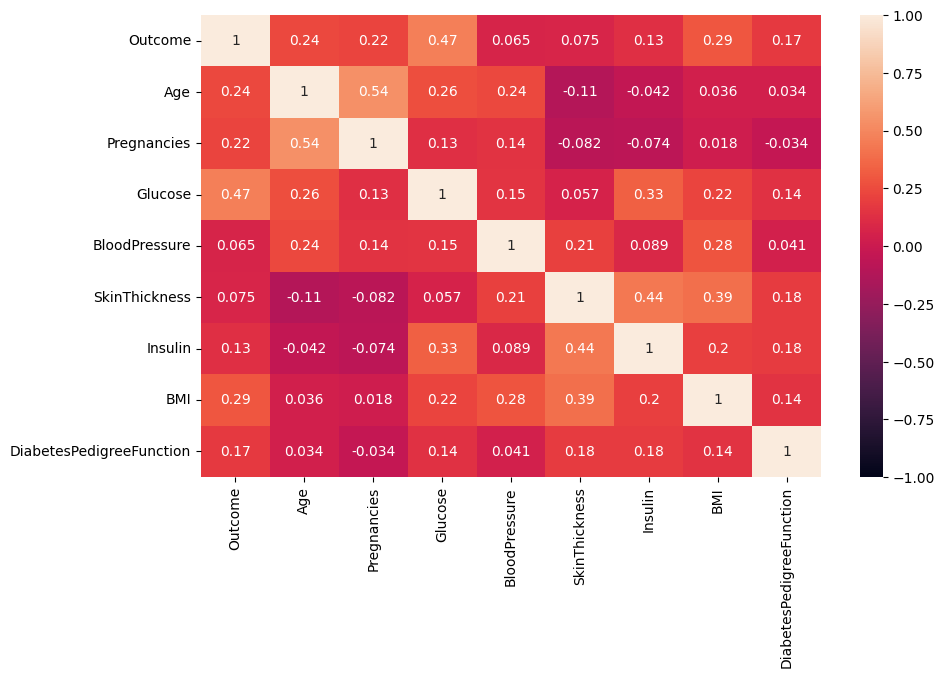

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data_c[['Outcome', 'Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].corr().round(3),vmax=1,vmin=-1,annot=True)

In [ ]:
feature_columns=['Age', 'Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

In [12]:
x=data_c[feature_columns]
y=data_c[['Outcome']]

In [21]:
x.describe()

,Age,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,33.240885,3.845052,120.894531,20.536458,79.799479,31.992578,0.471876
std,11.760232,3.369578,31.972618,15.952218,115.244002,7.884160,0.331329
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,24.000000,1.000000,99.000000,0.000000,0.000000,27.300000,0.243750
50%,29.000000,3.000000,117.000000,23.000000,30.500000,32.000000,0.372500
75%,41.000000,6.000000,140.250000,32.000000,127.250000,36.600000,0.626250
max,81.000000,17.000000,199.000000,99.000000,846.000000,67.100000,2.420000


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
predictions_dt = model_dt.predict(x_test)

In [15]:
accuracy_score(y_test, predictions_dt)

0.7012987012987013

In [16]:
model_lr = LogisticRegression(penalty=None)
model_lr.fit(x_train, y_train)
predictions_lr = model_lr.predict(x_test)

In [17]:
accuracy_score(y_test, predictions_lr)

0.7142857142857143

In [20]:
from pickle import dump
dump(model_lr, open("../models/logistic_regression_model.sav", "wb"))